# Horses.csv
#### 22-02-2024
#### Tomos Power

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

/var/folders/3f/gcl6700s4sd3fs44gs8l6w880000gn/T/ipykernel_54823/1007983042.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Part 1: EDA

### Data Quality

In [2]:
# Import data
df = pd.read_csv("./Horses.csv")

# Visual check of the data for any obvious errors
pd.options.display.max_columns = None
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Hood,Visor,EyeShield,Eyecover,TongueStrap,CheekPieces,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,26.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Jan,NaN,NaN,NaN,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-Jan,NaN,NaN,NaN,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,33.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-Apr,NaN,NaN,NaN,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-Jan,NaN,NaN,NaN,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


Notes on data:
1. Lots of missing data. Will check counts of NaNs per variable 
2. Forecast and Starting Price seem to have been entered as dates, but perhaps should be odds
3. Error in the Scheduled time variable - needs to be removed 
4. MeetingDate is a date - check it's been processed correctly
5. Lots of horse racing terminology used - will need to be careful that variables make sense in context

In [3]:
# Look at coverage of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RaceID              36819 non-null  int64  
 1   HorseID             36819 non-null  int64  
 2   Cloth               36819 non-null  int64  
 3   Stall               36615 non-null  float64
 4   WeightValue         36819 non-null  int64  
 5   JockeyID            36818 non-null  float64
 6   AllowanceValue      1609 non-null   float64
 7   OverweightValue     106 non-null    float64
 8   TrainerID           36819 non-null  int64  
 9   OwnerID             36616 non-null  float64
 10  LastRunDaysFlat     34300 non-null  float64
 11  Age                 36616 non-null  float64
 12  Blinkers            10342 non-null  float64
 13  Hood                0 non-null      float64
 14  Visor               68 non-null     float64
 15  EyeShield           0 non-null      float64
 16  Eyec

Further data cleaning steps:
- We should remove useless variables (all null)
- There seem to be rows that should be removed for data quality purposes e.g. 36814 out of 36819 non-null for DamID - or even 32009 when looking at starting price. The decision of whether to exclude observations will depend upon the business context of the task
- Some variables with very low non-nulls - these could be legitimate (e.g. OverweightValue)


In [4]:
# Remove variables with all null
df = df.dropna(axis=1, how="all")

In [5]:
month_dic = {
    "Jan": "1",
    "Feb": "2",
    "Mar": "3",
    "Apr": "4",
    "May": "5",
    "Jun": "6",
    "Jul": "7",
    "Aug": "8",
    "Sep": "9",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12",
}

def changeOdds(df, oddsVar, newOddsVar):
    """
    Input: Odds var where dates need to be replaced
        name for new odds variable
    Output: returns dataframe with new odds var
    """

    for i, j in month_dic.items():
        df[oddsVar] = df[oddsVar].str.replace(i, j)

    df[oddsVar] = df[oddsVar].str.replace("-", "/")

    df[newOddsVar] = np.where(
        (df[oddsVar].str.contains("/")),
        pd.to_numeric(df[oddsVar].str.split("/").str[0])
        / pd.to_numeric(df[oddsVar].str.split("/").str[1]),
        df[oddsVar],
    ).astype(float)
    return df


df = changeOdds(df, "StartingPrice", "SP")
df = changeOdds(df, "ForecastPrice", "FP")

# Check it has worked
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Visor,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won,SP,FP
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,26.0,3.0,NaN,NaN,16/1,NaN,NaN,NaN,12/1,SAF,2803520.0,2004880.0,2179351.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0,12.0,16.00
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,NaN,3.0,NaN,NaN,20/1,NaN,NaN,NaN,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0,40.0,20.00
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,NaN,3.0,NaN,NaN,10/1,NaN,NaN,NaN,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0,NaN,10.00
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,33.0,3.0,NaN,NaN,07/4,NaN,NaN,NaN,11/10,SAF,2347111.0,2170013.0,2071137.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1,1.1,1.75
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,24.0,3.0,NaN,NaN,08/1,NaN,NaN,NaN,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0,NaN,8.00


In [6]:
# Look at num of unique values to determine how to visualise
df.nunique()

RaceID                3000
HorseID               6064
Cloth                   30
Stall                   30
WeightValue             39
JockeyID               248
AllowanceValue           9
OverweightValue          5
TrainerID              160
OwnerID               3077
LastRunDaysFlat        384
Age                      9
Blinkers                90
Visor                   16
ForecastPrice           57
StatCourse               9
StatDistance             9
StatCourseDistance       7
StartingPrice           88
Bred                    13
DamID                 4181
SireID                 296
DamSireID              733
Sex                      5
Colour                   9
YearBorn                 7
MeetingID              344
RaceNumber              13
ScheduledTime            1
HorseCount              18
Runners                 17
Going                    7
Weather                 11
Course_Distance         30
RaceType                 1
TrackType                3
Handicap                 2
e

Note - Most granular information - horseID


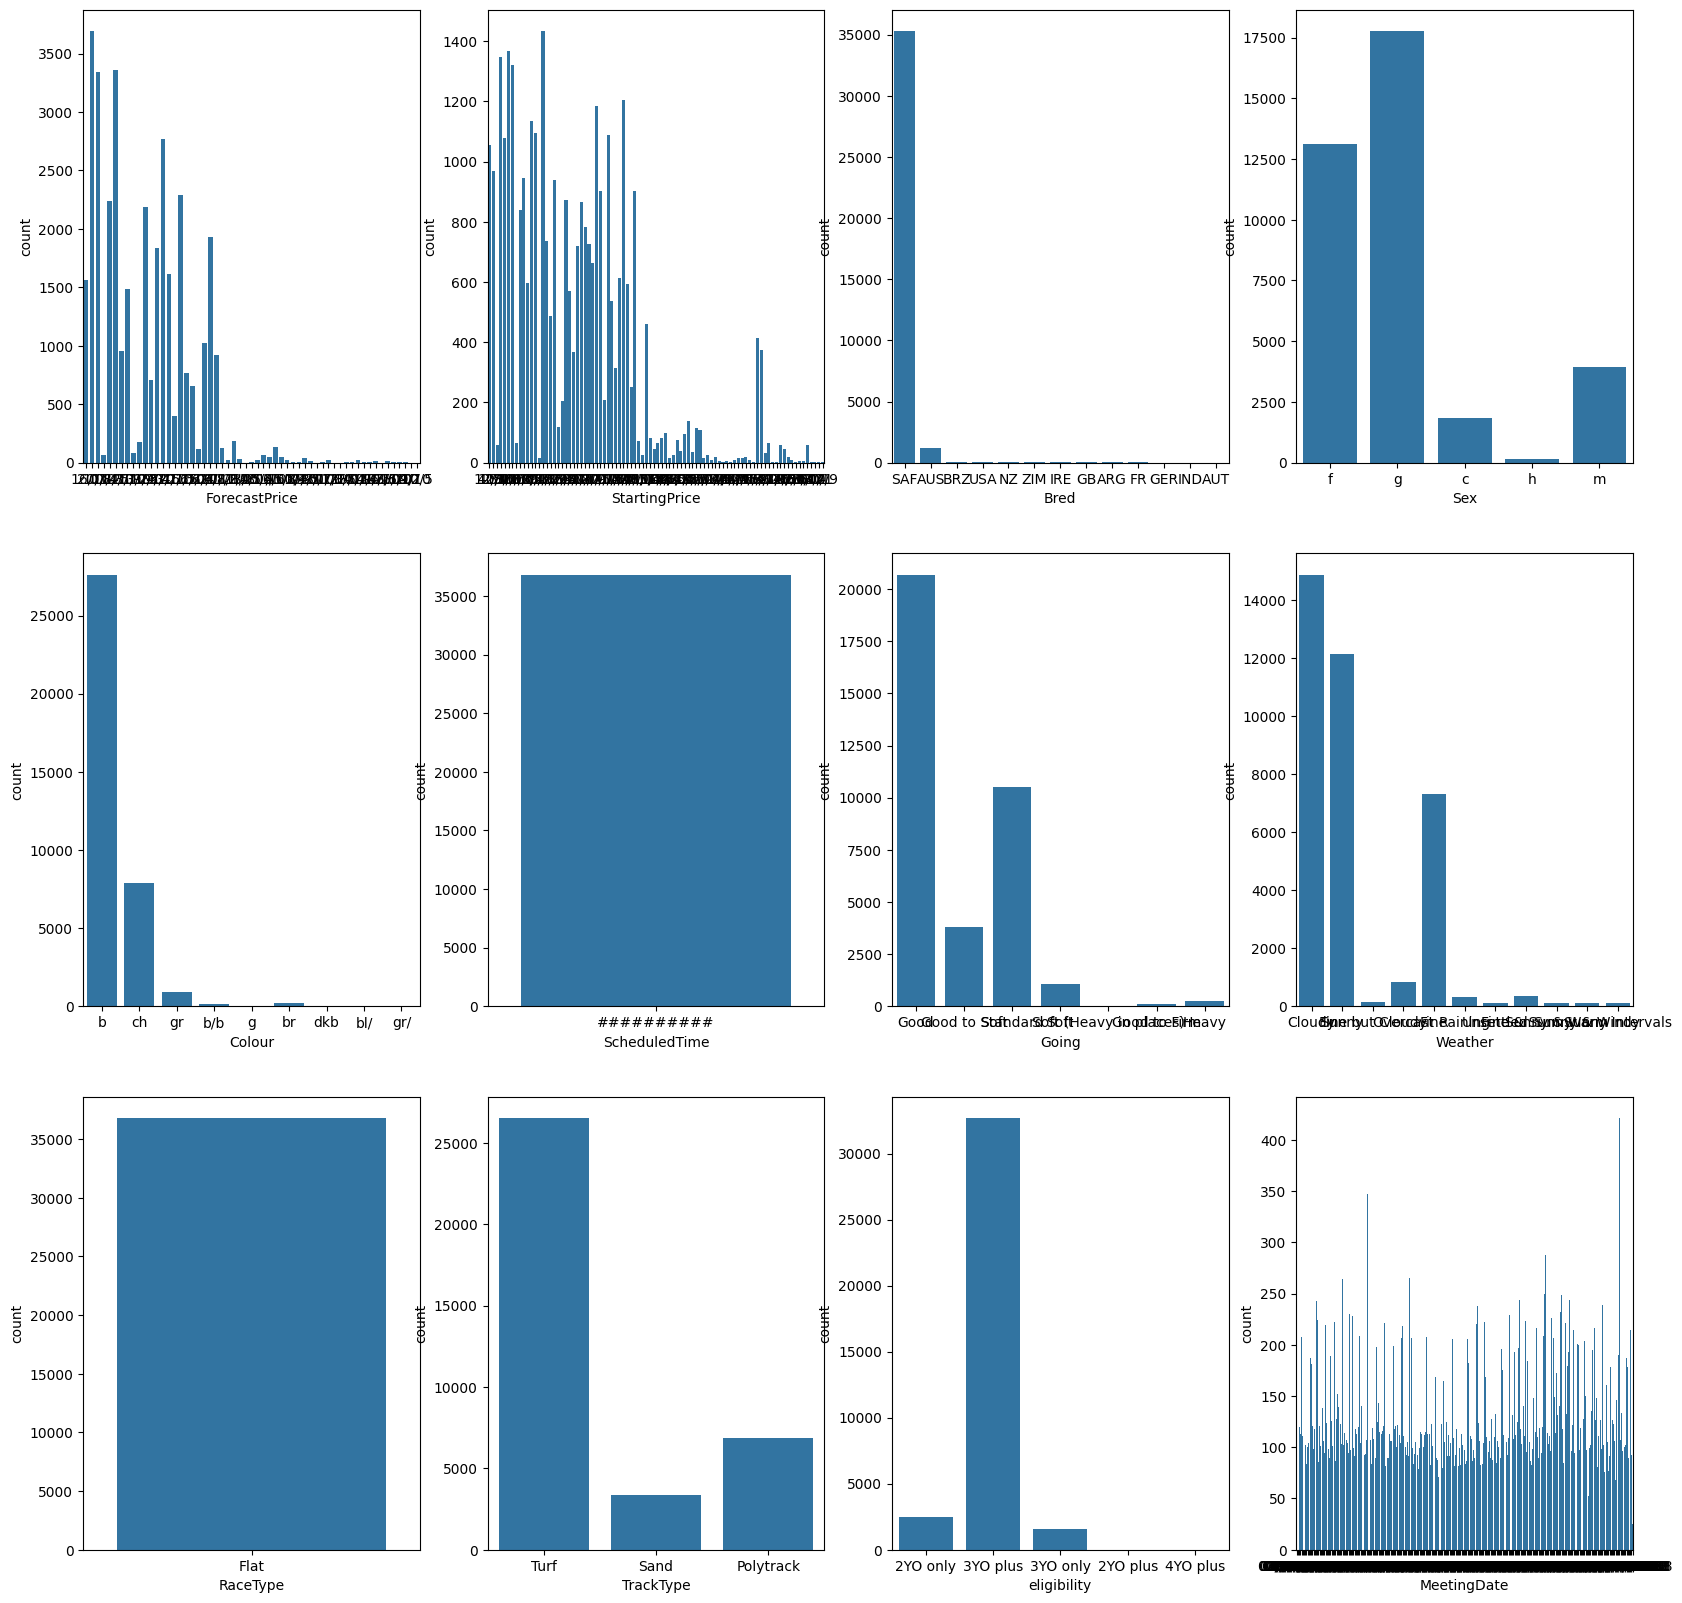

In [7]:
# select the float columns
df_num = df.select_dtypes(include=[np.number])
# select non-numeric columns
df_cat = df.select_dtypes(exclude=[np.number])

# Plot categorical data
fig, ax = plt.subplots(3, 4, figsize=(20, 20))
for var, subplot in zip(df_cat.columns.to_list(), ax.flatten()):
    sns.countplot(x=df[var], ax=subplot)

- Should remove ScheduledTime and RaceType
- A bit confused that about Sex variable



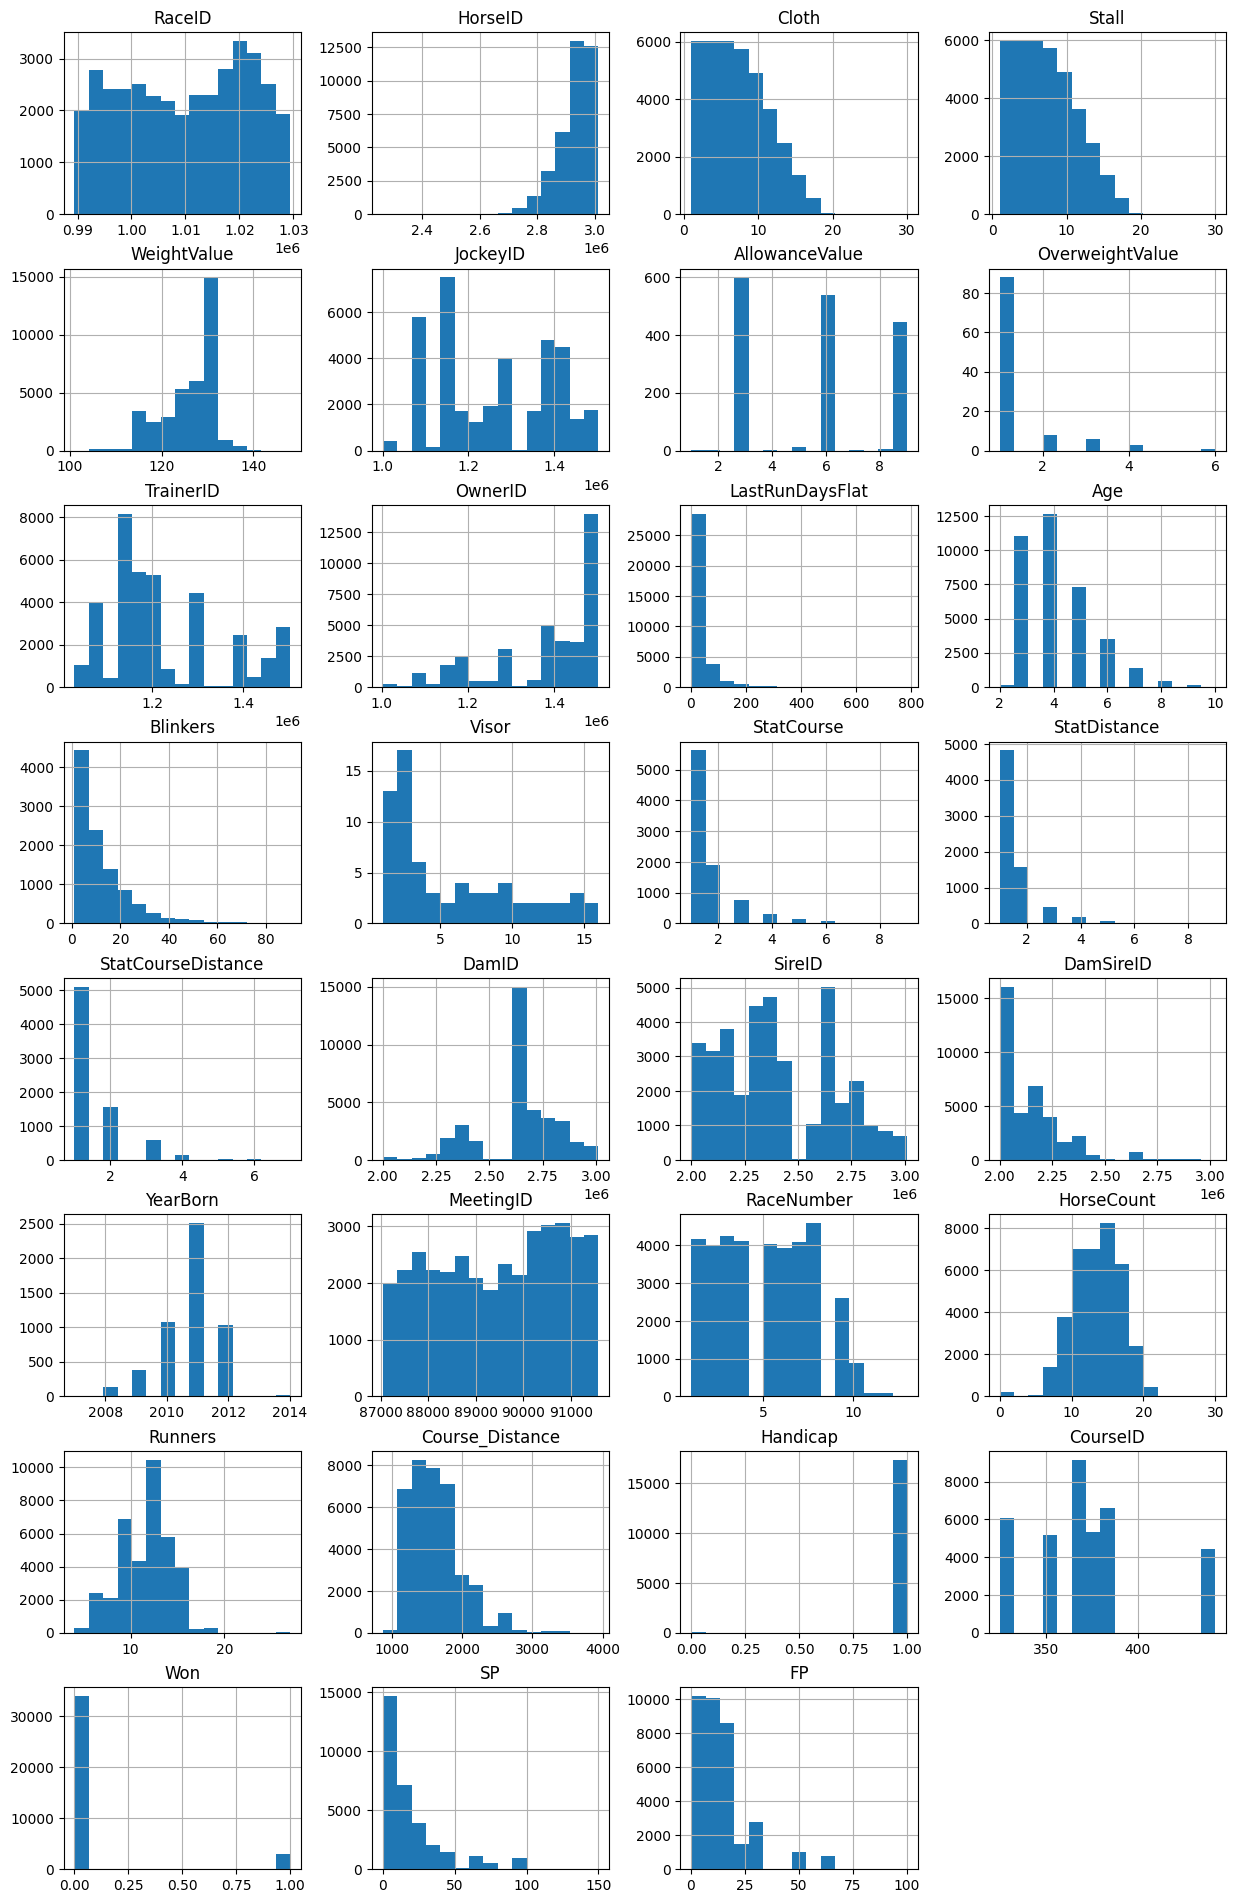

In [8]:
# Remove ScheduledTime and RaceType
df = df.drop(columns=["ScheduledTime", "RaceType"])

# Plot numeric variables
df_num.hist(bins=15, figsize=(15, 30), layout=(10, 4));

- Plenty of IDs
- Handicap is a binary flag 
- Lots of horse racing terminology to get to grips with

<Axes: xlabel='day', ylabel='count'>

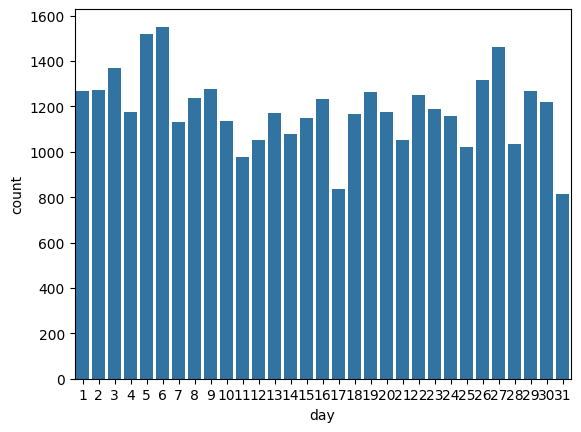

In [9]:
# convert the date column into a datetime object
df["MeetingDate"] = pd.to_datetime(df["MeetingDate"], dayfirst=True)

# extract the day, month, and year components
df["day"] = df["MeetingDate"].dt.day
df["month"] = df["MeetingDate"].dt.month
df["year"] = df["MeetingDate"].dt.year

sns.countplot(x=df["day"])

- Day looks like a sensible distribution

<Axes: xlabel='month', ylabel='count'>

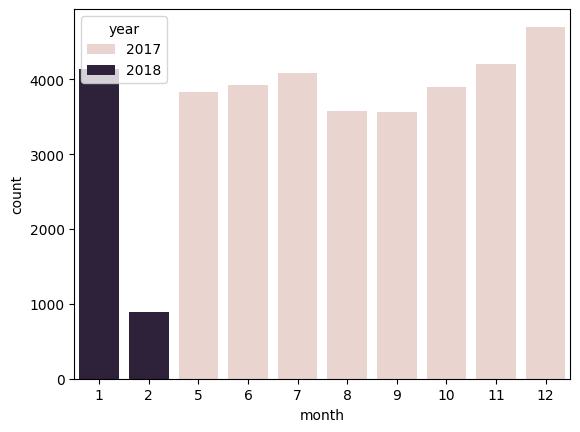

In [10]:
sns.countplot(x=df["month"], hue=df["year"])

- Looks like data was collected from May 2017 to Feb 2018 (is this the racing season? or is this a data quality issue?)

## Part 2: Dimensional Modelling

1. Select the business process:
    Not sure what exactly is desired from this data
    I wil assume that we are wanting to see if there are any factors in deciding if a horse wins a race
2. Select the grain:
    The most granular piece of information is each horse in each race and whether it won or not
3. Dimensions should follow from the various IDs we have on the dataset
    Need to as Who, What, Where, When 
    

In [11]:
# Look at list of columns to decide on dimensions
df.columns.to_list()

['RaceID',
 'HorseID',
 'Cloth',
 'Stall',
 'WeightValue',
 'JockeyID',
 'AllowanceValue',
 'OverweightValue',
 'TrainerID',
 'OwnerID',
 'LastRunDaysFlat',
 'Age',
 'Blinkers',
 'Visor',
 'ForecastPrice',
 'StatCourse',
 'StatDistance',
 'StatCourseDistance',
 'StartingPrice',
 'Bred',
 'DamID',
 'SireID',
 'DamSireID',
 'Sex',
 'Colour',
 'YearBorn',
 'MeetingID',
 'RaceNumber',
 'HorseCount',
 'Runners',
 'Going',
 'Weather',
 'Course_Distance',
 'TrackType',
 'Handicap',
 'eligibility',
 'CourseID',
 'MeetingDate',
 'Won',
 'SP',
 'FP',
 'day',
 'month',
 'year']

In [12]:
# Define the dimensions
print("Number of unique HorseID is {}".format(df["HorseID"].nunique()))

sql = """
    SELECT DISTINCT 
        HorseID
        , YearBorn
        , DamID
        , SireID
        , DamSireID
        , Sex
        , Colour
        , Bred
    FROM df;
"""
dimHorse = ps.sqldf(sql)
dimHorse.info()

Number of unique HorseID is 6064
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HorseID    6064 non-null   int64  
 1   YearBorn   736 non-null    float64
 2   DamID      6062 non-null   float64
 3   SireID     6062 non-null   float64
 4   DamSireID  6062 non-null   float64
 5   Sex        6062 non-null   object 
 6   Colour     6062 non-null   object 
 7   Bred       6064 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 379.1+ KB


In [13]:
print("Number of unique RaceID is {}".format(df["RaceID"].nunique()))

sql = """
    SELECT DISTINCT 
        RaceID
        , RaceNumber
        , Runners
        , HorseCount
        , Going
        , Weather
        , Course_Distance
        , TrackType
    FROM df;
"""
dimRace = ps.sqldf(sql)
dimRace.info()

Number of unique RaceID is 3000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RaceID           3000 non-null   int64  
 1   RaceNumber       3000 non-null   int64  
 2   Runners          2999 non-null   float64
 3   HorseCount       3000 non-null   int64  
 4   Going            2965 non-null   object 
 5   Weather          2965 non-null   object 
 6   Course_Distance  3000 non-null   int64  
 7   TrackType        2993 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 187.6+ KB


In [14]:
print("Number of unique MeetingID is {}".format(df["MeetingID"].nunique()))

sql = """
    SELECT DISTINCT 
        MeetingID
        , MeetingDate
        , Day
        , Month
        , Year
    FROM df;
"""
dimMeeting = ps.sqldf(sql)
dimMeeting.info()

Number of unique MeetingID is 344
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MeetingID    344 non-null    int64 
 1   MeetingDate  344 non-null    object
 2   day          344 non-null    int64 
 3   month        344 non-null    int64 
 4   year         344 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 13.6+ KB


In [15]:
# Not best practice - need to consider the fact that owners/trainers change over time

print("Number of unique OwnerID is {}".format(df["OwnerID"].nunique()))

sql = """
    SELECT DISTINCT 
        HorseID
        , MeetingID
        , OwnerID
        , JockeyID
        , TrainerID
    FROM df;
"""
dimChanges = ps.sqldf(sql)
dimChanges.info()

Number of unique OwnerID is 3077
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HorseID    36819 non-null  int64  
 1   MeetingID  36819 non-null  int64  
 2   OwnerID    36616 non-null  float64
 3   JockeyID   36818 non-null  float64
 4   TrainerID  36819 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


4. Fact table as horses's performance in race

In [16]:
sql = """
    SELECT DISTINCT
        HorseID
        , RaceID
        , MeetingID
        , Won
        , ForecastPrice
        , StartingPrice
        , Handicap
        , eligibility
        , StatCourse
        , StatDistance
        , StatCourseDistance
    FROM df;
"""
factTable = ps.sqldf(sql)
factTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HorseID             36819 non-null  int64  
 1   RaceID              36819 non-null  int64  
 2   MeetingID           36819 non-null  int64  
 3   Won                 36819 non-null  int64  
 4   ForecastPrice       35092 non-null  object 
 5   StartingPrice       32009 non-null  object 
 6   Handicap            17406 non-null  float64
 7   eligibility         36768 non-null  object 
 8   StatCourse          8832 non-null   float64
 9   StatDistance        7128 non-null   float64
 10  StatCourseDistance  7456 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 3.1+ MB


Dimensional Model consists of 4 dimensions and on fact table:
- dimHorse
- dimRace
- dimMeeting
- dimChanges
- factTable


Dimensional model needs further work. 
- Need to consider how relationships change overtime, and which table structure suits that best:
- A better understanding of the horse terms will mean better table structures
- More fields should be added to give context to the dimensions (e.g. for dimMeeting - what day of week, bank holiday flag etc.)

## Part 3: Analytics/Reporting:


<Axes: xlabel='Sex'>

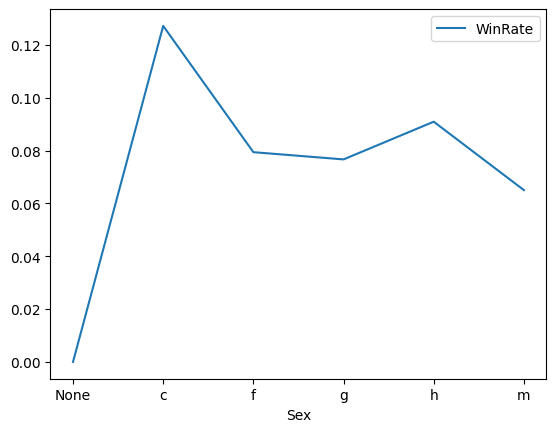

In [17]:
# Plot win rate by Sex

sql = """
    SELECT b.Sex 
        , avg(a.Won) AS WinRate
    FROM factTable AS a
    LEFT JOIN dimHorse AS b 
        ON a.HorseId = b.HorseID
    GROUP BY 1
"""
ps.sqldf(sql).plot(x="Sex")

<Axes: xlabel='Sex', ylabel='count'>

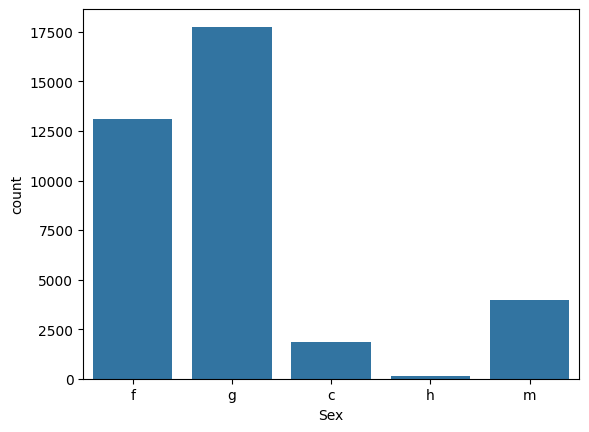

In [18]:
# Plot count of Sex
sns.countplot(x=df["Sex"])

Colts have a much higher winrate, even though there are relatively few of them 

<Axes: xlabel='winRate', ylabel='countOfRaces'>

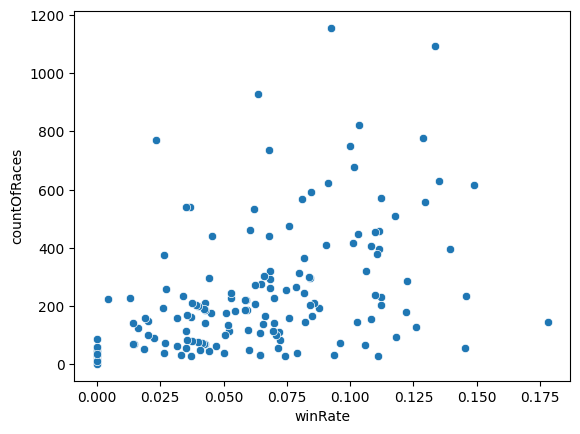

In [19]:
# Is there a connection between Trainer ID and winner?

sql = """
    SELECT b.TrainerID
        , count(1)  AS countOfRaces
        , avg(a.Won) AS winRate
    FROM factTable AS a
    LEFT JOIN dimChanges AS b 
        ON a.HorseId = b.HorseID
        AND a.MeetingID = b.MeetingID
    GROUP BY 1
    ORDER BY 3 DESC
"""
trainer = ps.sqldf(sql)
sns.scatterplot(data=trainer, x="winRate", y="countOfRaces")

In [20]:
# Im interested in the trainer on the far right (low number of races, but very high win rate)
sql = """
    SELECT * FROM trainer
    WHERE winRate > 0.175
"""
ps.sqldf(sql)

,TrainerID,countOfRaces,winRate
0,1101907,146,0.178082


In [21]:
# Im also interested in the trainer on the top right (high win rate and high number of races)
sql = """
    SELECT * FROM trainer
    WHERE winRate > 0.125 AND countOfRaces > 1000
"""
ps.sqldf(sql)

,TrainerID,countOfRaces,winRate
0,1140076,1094,0.133455


Further points for analysis:
- odds variables' relationship with Won
- whether specific Dam/Sires produce better horses
- whether some horses prefer different types of race (length, type etc.)

## Part 4: Modelling

We need to predict the winner. 
To do this, we need to create race-level variables as these will be more useful that horse-race-level variables

### 4.1 - Preprocessing

Given the variables we have, we'll make a prediction of the variable 'Won' and then choose the highest prob as our winner per race

Given the further modelling task, I'd like to do some further data cleaning:

In [22]:
# Remove all those Races where there is not a winner on the dataset

sql1='''
    SELECT 
        RaceID
    FROM df 
    GROUP BY 1
    HAVING sum(Won) = 1
    '''
WinnerExists = ps.sqldf(sql1)

sql2 = '''
    SELECT a.* 
    FROM df AS a
    INNER JOIN WinnerExists AS b 
        ON a.RaceID = b.RaceID
    '''
df_pt1 = ps.sqldf(sql2)


In [23]:
# Add variable for Days Since Last race 
# Impute NANs with high number 

df_pt1['MeetingDate'] = pd.to_datetime(df_pt1['MeetingDate'])

df_pt1['DaysSinceLastRace'] = (df_pt1.sort_values(by=['MeetingDate'], ascending=True)
                            .groupby('HorseID')['MeetingDate']
                            .diff()
                            .dt.days
                            .fillna(999, downcast='int'))

/var/folders/3f/gcl6700s4sd3fs44gs8l6w880000gn/T/ipykernel_54823/3717064189.py:6: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df_pt1['DaysSinceLastRace'] = (df_pt1.sort_values(by=['MeetingDate'], ascending=True)


In [24]:
# Remove variables that will not work well in classifier model (IDs especially)

cols = list(df_pt1.columns)
IDs = [x for x in cols if x.endswith("ID")]

#Keep RaceID and HorseID for identification later 

IDs.remove("RaceID")
IDs.remove("HorseID")

to_remove = ['ForecastPrice', 'StartingPrice', 'MeetingDate', 'day'] + IDs

remain = [x for x in cols if x not in to_remove]

print("To Remove: ", to_remove)
print("To Remain", remain)

To Remove:  ['ForecastPrice', 'StartingPrice', 'MeetingDate', 'day', 'JockeyID', 'TrainerID', 'OwnerID', 'DamID', 'SireID', 'DamSireID', 'MeetingID', 'CourseID']
To Remain ['RaceID', 'HorseID', 'Cloth', 'Stall', 'WeightValue', 'AllowanceValue', 'OverweightValue', 'LastRunDaysFlat', 'Age', 'Blinkers', 'Visor', 'StatCourse', 'StatDistance', 'StatCourseDistance', 'Bred', 'Sex', 'Colour', 'YearBorn', 'RaceNumber', 'HorseCount', 'Runners', 'Going', 'Weather', 'Course_Distance', 'TrackType', 'Handicap', 'eligibility', 'Won', 'SP', 'FP', 'month', 'year', 'DaysSinceLastRace']


In [25]:
#Drop columns
df_pt1 = df_pt1.drop(labels=to_remove, axis=1)

#Impute NaNs

df_pt1 = df_pt1.replace(np.nan, -9999)
df_pt2 = df_pt1.copy()

In [26]:
# Check how many unique values and bin accordingly 

df_pt2.nunique()

RaceID                2873
HorseID               6056
Cloth                   30
Stall                   31
WeightValue             39
AllowanceValue          10
OverweightValue          6
LastRunDaysFlat        381
Age                     10
Blinkers                91
Visor                   17
StatCourse              10
StatDistance            10
StatCourseDistance       8
Bred                    13
Sex                      6
Colour                  10
YearBorn                 8
RaceNumber              13
HorseCount              17
Runners                 17
Going                    8
Weather                 12
Course_Distance         30
TrackType                4
Handicap                 2
eligibility              6
Won                      2
SP                      89
FP                      57
month                   10
year                     2
DaysSinceLastRace      222
dtype: int64

In [27]:
# Varaibles with more than 20 unique values will be binned 

varsToBeBinned = ['LastRunDaysFlat', 'Cloth', 'Stall', 'WeightValue', 'Blinkers', 'Course_Distance', 'SP', 'FP', 'DaysSinceLastRace']

# 10 bins for the highest numbers 

def binVar(var, numBins):
    '''
    Input: variable and number of bins 
    Output: binned variable
    '''
    df_pt2[var+'Bin'] = pd.qcut(df_pt2[var], q=numBins)

binVar('LastRunDaysFlat', 10)
binVar('Blinkers', 1)
binVar('SP', 10)
binVar('FP', 10)
binVar('Cloth', 5)
binVar('DaysSinceLastRace', 5)
binVar('Stall', 5)
binVar('WeightValue', 5)
binVar('Course_Distance', 4)

# Drop non binned variables 

df_pt3 = df_pt2.drop(labels=varsToBeBinned, axis=1)

In [28]:
special = ['RaceID', 'HorseID', 'Won']

cols = [x for x in df_pt3.columns.to_list() if x not in special]

df_pt4 = pd.get_dummies(df_pt3, columns=cols)

In [29]:
# Split data into X and y 
X = df_pt4.drop(columns=['Won', 'RaceID','HorseID'])
y = df_pt4['Won']

### 4.2 Create model
#### 4.2.1 Logisitic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
lr = LogisticRegression(max_iter=300)
lr_modelvar = list(X_train.columns)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=300)

Gini of Logistic Regression:  0.5617


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


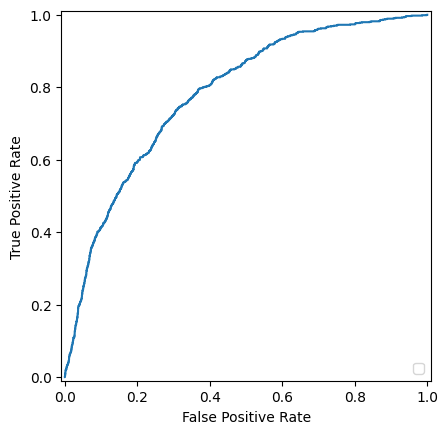

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

y_pred = lr.predict_proba(X_test)[:,1]
gini = 2 * (roc_auc_score(y_test, y_pred)) - 1

print("Gini of Logistic Regression: ", round(gini,4))

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


#### 4.2.2 Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
df_pt5 = df_pt1.copy()
df_pt5 = pd.get_dummies(df_pt5, columns=['Bred','Sex','Colour','Going','Weather','TrackType','eligibility'])

# Split data into X and y 
X = df_pt5.drop(columns=['Won', 'RaceID','HorseID'])
y = df_pt5['Won']
X.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35070 entries, 0 to 35069
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cloth                         35070 non-null  int64  
 1   Stall                         35070 non-null  float64
 2   WeightValue                   35070 non-null  int64  
 3   AllowanceValue                35070 non-null  float64
 4   OverweightValue               35070 non-null  float64
 5   LastRunDaysFlat               35070 non-null  float64
 6   Age                           35070 non-null  float64
 7   Blinkers                      35070 non-null  float64
 8   Visor                         35070 non-null  float64
 9   StatCourse                    35070 non-null  float64
 10  StatDistance                  35070 non-null  float64
 11  StatCourseDistance            35070 non-null  float64
 12  YearBorn                      35070 non-null  float64
 13  R

In [35]:
# Create model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_modelvar = list(X_train.columns)
y_pred = rf.predict(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Gini of Random Forest:  0.5143


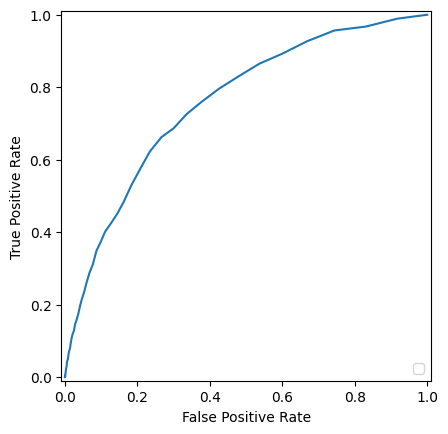

In [36]:
y_pred = rf.predict_proba(X_test)[:,1]
gini = 2 * (roc_auc_score(y_test, y_pred)) - 1

print("Gini of Random Forest: ", round(gini,4))

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=rf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [37]:
def winRace(df, race, model, modelvar):
    '''
    Input: 
        df: dataframe used for modelling
        race: RaceID
        model: model object (either log reg or rand forest)
        modelvar: list of variables used in model
    Output: Predicted winner and whether they actually won
    Returns: A dataframe
    '''
    #get race info
    rc= df[df["RaceID"] == race].copy()
    
    #get prob from model for each horse
    winpct = [col[1] for col in model.predict_proba(rc[modelvar])]
    rc['prob'] = winpct
    
    #get row with max prob
    max_ = rc.loc[rc['prob'].idxmax()]
    
    #return only needed variables 
    return(max_[['HorseID','prob','Won']])


# Calculate the percentage of correct predictions for both models

results_lr=[]

for race in list(df_pt4['RaceID'].unique()):
    if (winRace(df_pt4, race, lr, lr_modelvar).iloc[2] == 1):
        results_lr.append(1)
    else:
        results_lr.append(0)
        
pct_right_lr = 100*(sum(results_lr) / len(results_lr))

results_rf=[]

for race in list(df_pt5['RaceID'].unique()):
    if (winRace(df_pt5, race, rf, rf_modelvar).iloc[2] == 1):
        results_rf.append(1)
    else:
        results_rf.append(0)
        
pct_right_rf = 100*(sum(results_rf) / len(results_rf))

In [38]:
print('% of races predicted correctly using LR = ', pct_right_lr, '%')
print('% of races predicted correctly using RF = ', pct_right_rf, '%')

% of races predicted correctly using LR =  28.85485555168813 %
% of races predicted correctly using RF =  85.5899756352245 %


<Axes: >

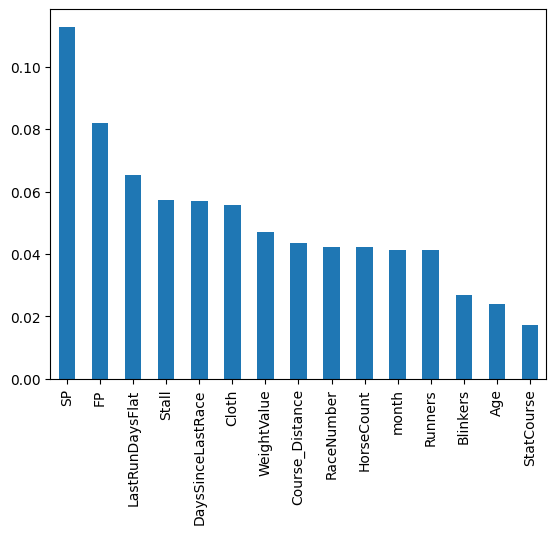

In [39]:
# Use the feature imprtances method of the random forest class to visulise predictive features in the rf model
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)
feature_importances.plot.bar()

## Final notes 
- I chose to not have an OOT sample as there was only one years worth of data and I didn't want seasonality to affect the mode 
- I'd like to look into creating more features as the ones I did came out as top predictors 
- From the two models created, I'd have to choose the random forest. I belive more value could be got out of logistic regression with more time spent binning variables approriately. I'd have like to use the OptBinning package - but couldn't install it.
- In the context of the task, the most important metric is % of races correctly predicted. I'd like to split this by train and test to make sure they're are not wildly different. 
- It's interesting that the gini for the log reg is higher: This implies that the model is separating winners from losers better overall. 
-   However that doesn't seem to translate to predicting the winner more often. 
- I'd like to explore the shapley library for feature importance in the case of random forest 